<h1 style="color:blue;">  <B> Tweets Clustering</B>  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$<B> BY INES REBHI</B>
 </h1>



html1 = '<img src="images/giphy.gif" width="400" height="400" align="center"/>'



<h3 style="color:blue;"> <B>Introduction</B>
 </B> </h3>

<B>Data redundancy is an important problem of Twitter. Twitter users are likely to generate similar tweets (e.g., using the Retweet function) about some popular topics/events.
a result of a huge number of tweets which let  tweetos not interested to loss time about reading for the same topic many tweets     
  So by clustering similar tweets together, we can generate a more concise and organized representation of the raw tweets, which will be very useful for busy Tweetos to read only one tweet per class  </B> </br>

<B> Aim of our Project is to  </B>
<li> <B>1/ gathering real time tweets  using a twitter API </B></li>
<li><B> 2/ Preprocessing tweets </B> </li>
<li><B> 3/Apply a NLP to text tweets</B> </li>
<li><B> 4/ Modeling By using K-means as a ML algorithm of clustering </B></li>

<h3 style="color:blue;"> <B>Keywords </B></h3>

<B>Text mining  $~~~/~~~~$clustering$~~~/~~~~$NLP $~~~/~~~~$tweepy$~~~/~~~~$ NLTK$~~~/~~~~$ twitter API </B>

<h3 style="color:blue;"> <B>STEP1: Getting API keys from Twitter</B>
 </B> </h3>

<B>An API is standing for Application Programming Interfaces (APIs) and they allow you to access resources only available on the server</B></br>
<B>Now The Twitter API lets you read and write Twitter data. Thus, you can use it to compose tweets, read profiles, and access your followers’ data and a high volume of tweets on particular subjects in specific locations.</B></br>
<B>So how can I get an API from twitter developer ??? </B>


<B style="color:orangered;">1/ Create  twitter account </B>


<img src="images/accounttwitter.PNG">

<B style="color:orangered;">2/Try this link to see how apply for a twitter api </B> </br></br>

<B>https://www.youtube.com/watch?v=vlvtqp44xoQ </B>

<B style="color:orangered;">3/ Create a project in twitter developer</B>

<img src="images/Capture.PNG">

</br>

<B style="color:orangered;">3/Get API  Keys </B>

<img src="images/api.PNG">

<B style="color:orangered;"> 3/ Install Tweepy </B>

<B>Tweepy is an open source Python package that gives you a very convenient way to access the Twitter API with Python. Tweepy includes a set of classes and methods that represent Twitter’s models and API endpoints, and it transparently handles various implementation details, such as:</B>

<B>* Rate limits</B>
    
<B>* Streams</B>

<B> * Data encoding and decoding</B>
    
<B> * HTTP requests</B>
    
<B>* Results pagination</B>
    
<B>* OAuth authentication</B>
    


<B style="color:orangered;">4/ import Libraries  and credentials in our project </B> 

In [15]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Twitter App access keys for @user 
#credential part

# Consume:
CONSUMER_KEY    = 'pUruES5UQBACkbkcOolgfmjop'
CONSUMER_SECRET = 'H0zY8T19bQIAMGKxTNEVZV4T52QNMfruGu8FLbECmizbw7qr7l'

# Access:
ACCESS_TOKEN  = '1324988873538228224-Sbn1EJXcxKeItAV33UzO7wX7TsFYjA'
ACCESS_SECRET = 'MMyMliA8oNgEYspY3mKQ4Wi73F4YsD9CiELkyChQpxebo'
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
api=  tweepy.API(auth)

<h3><B style="color:blue;">STEP2: Gathring DATA  </B> </h3>

<B style="color:orangered;">1/ Live streaming tweets
  </B> 

<B>In this Part we need to stream 10 000 tweets in real-time  from
Twitter to solve the task of tweets clustering </B> 


<div class="alert alert-block alert-danger">
<b>Danger:</b> <B>Please don't run this cell because it can make you a lot of time to do the streaming ! </B> 
</div>

In [ ]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
 
class listener(StreamListener):
    def on_data(self,data):
       
            saveFile = open('live_tweets1.json','a')
            saveFile.write(data)
            saveFile.write('\n')
            saveFile.close()
            return True
       
            time.sleep(5)
    def on_status(self, status):
        try:
            if hasattr(status, 'retweeted_status') and hasattr(status.retweeted_status, 'extended_tweet'):
                print('retweeted: ' + status.retweeted_status.extended_tweet['full_text'])
            if hasattr(status, 'extended_tweet'):
                print('extended_tweet: ' + status.extended_tweet['full_text'])
            else:
                print('text: ' + status.text)
        except AttributeError:
            print('attribute error: ' + status.text)
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
twitterStream = Stream(auth,listener(),tweet_mode='extended')

twitterStream.filter(languages=["en"],track=["politic" , "health" , "sport","business","entertaiment"])

<h3><B style="color:blue;">STEP3:DATA PREPARATION </B> </h3>


><h3><B style="color:orangered;">Data Processing and Wrangling  </B> </h3>


>><B style="color:green;"> 1/ From json to csv </B> 


<B>the csv form  serve to make our dataset(tweets) more visualised than json form. So we need to change our dataset from json to csv </B>


<div class="info info-block alert-info">
<b>INFO:</b> <B>It's unused to run these two cells </B> 
</div>

In [62]:
import pandas as pd
df = pd.read_json ('tweetsstreamed.json',lines = True)
export_csv = df.to_csv ('bdtweets.csv', index = None, header=True)

In [56]:
df = pd.read_json ('live_tweets.json',lines = True)
export_csv = df.to_csv ('bdtweets2.csv', index = None, header=True)

>><B style="color:green;"> 2/Cleaning text </B> 


>><B>In this step we will 
<B><li>transform tweet text into lowercase</li></B>
<B><li>remove twitter handles</li></B>
<B><li>remove hyperlinks</li></B>
    <B><li>remove non-alphanumeric characters such as punctuation marks </li></B>
<B><li>remove whitespace</li></B>

<B>a/keep only the text column and ignore the rest of features</B>

In [5]:
import pandas as pd 
tweets = pd.read_csv("bdtweets2.csv", usecols = ['text'])
print("shape of tweets dataframe with duplicated tweets",tweets.shape)
tweets.head()


shape of tweets dataframe with duplicated tweets (20422, 1)


,text
0,@WTAJnews Great! Another going out of busines...
1,@DailyCaller @LisaMarieBoothe Health and educa...
2,RT @MatthewJshow: @realDonaldTrump China is we...
3,Video: Demba Ba sees red as he stands up for h...
4,RT @texman71: Fuck your restrictions!!


In [7]:
tweets.tail()


,text
20417,TAKE ACTION AND OPPOSE RUSHED APPROVALS WITHOU...
20418,Revive your aging skin and reduce the appearan...
20419,Busy 🐝!!!! \n\nWhen you own a business this is...
20420,"RT @JeaneF1MSP: Dear @BBCScotNine, unpaid care..."
20421,RT @hycfreedom: @HBO @HackedOffHugh HUNTER BID...


In [8]:
tweets['text'].value_counts()


RT @SenTomCotton: This opinion reads like the delusional ramblings of a Resistance lawyer afflicted with Trump Derangement Syndrome. Judge…         186
RT @btsportfootball: Nothing but respect ❤️\n\nMessi 🤝 Ronaldo\n\n📺 BT Sport ESPN HD https://t.co/Qo1KUQKZ7Q                                        171
RT @SteveGuest: Joe Biden defeated AGAIN by the Teleprompter.\n\n"For Secretary of Health and Education Services, I nominate Xavier Bacheria.…      153
RT @MelissaReddy_: Demba Ba 👏🏽\nIstanbul Basaksehir 👏🏽\nPSG 👏🏽\n\nShowing us 'zero tolerance' is more than just empty words, can be easily acti…    137
RT @SchmittNYC: Biden didn’t nominate Becerra - his handlers did                                                                                    120
                                                                                                                                                   ... 
RT @nickchodgson: Another great interview by @HelenDon_RCN on nursing staff’s leading ro

><B>we are looking in our dataset and  note that we have many duplications that we must removing</B>

<B>b/Remove duplicated tweets </B>

In [9]:

tweets.drop_duplicates(subset='text',inplace=True)
# tweets.drop_duplicates(subset=['text'], keep='first', inplace=True)  #tou can also run this line of code to drop duplicate tweets

print("shape of tweets dataframe After removing duplicated tweets",tweets.shape)


shape of tweets dataframe After removing duplicated tweets (13937, 1)


><B> we can showing top of hashtag in our dataset </B>

In [11]:
import re
import numpy as np
from collections import Counter

tweets['hashtags'] = tweets['text'].apply(lambda twt : re.findall(r"#(\w+)", twt))
d = Counter(tweets.hashtags.sum())
# print(d)

In [12]:
tweets_hashtags = pd.DataFrame([d]).T
tweets_hashtags.columns = ['freq']
tweets_hashtags.freq.sum()

3602

In [13]:
tweets_hashtags.sort_values(by=['freq'], ascending=False, inplace=True)
print("top hashtag in our dataset")
tweets_hashtags.head(10)


top hashtag in our dataset


,freq
COVID19,103
business,81
health,42
assignment,38
homework,33
Nursing,31
research,31
Literature,29
Essay,28
chemistry,26


Among 20000 Tweets, 3602 Hashtags were used.


Text(0.5, 1.0, 'Top 10 Hashtags of dataset')

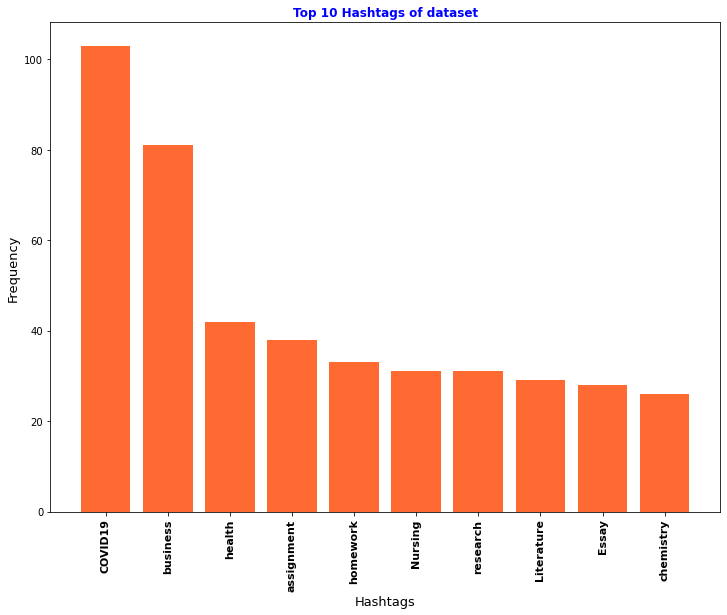

In [16]:
### Visualization of Top 10 Hashtags
labels = tweets_hashtags.head(10).index.values.tolist()
freq = tweets_hashtags['freq'].head(10).values.tolist()
index = np.arange(len(freq))

print("Among 20000 Tweets, 3602 Hashtags were used.")
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'orangered')
plt.xlabel('Hashtags', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 10 Hashtags of dataset', fontsize=12, fontweight="bold",color='blue')

In [17]:
tweets = tweets.drop(['hashtags'], axis=1)


 <B> c/extract the username through the tweets (preceded by @ or by RT @), emojis,punctuation</B></p> 

In [22]:
import re


#clean text

def CleanText(TextToClean):
    TextToClean.lower()  #Normalization
    TextToClean = re.sub(r'@[A-Za-z0-9]+', '',str(TextToClean)) #to extract @
    TextToClean= re.sub(r':','',str(TextToClean)) #to remove :
    TextToClean= re.sub(r'\n','',str(TextToClean)) #to remove  \n
    TextToClean= re.sub(r'#','',str(TextToClean)) #to remove #
    TextToClean= re.sub(r'!','',str(TextToClean)) #to remove #
    TextToClean = re.sub(r'RT[\s]','',str(TextToClean)) #to remove #
    TextToClean = re.sub(r'https','',str(TextToClean)) #to remove hyper links
    TextToClean = re.sub(r'_','',str(TextToClean)) #to remove hyper links
    TextToClean = re.sub(r'~~~@…','',str(TextToClean)) #to remove blanc space
    TextToClean =re.sub(r"\&\S*\s", "", str(TextToClean))
    TextToClean = re.sub(r"\&", "", str(TextToClean))
    TextToClean= re.sub(r"\+", "", str(TextToClean))
    TextToClean = re.sub(r"\#", "", str(TextToClean))
    TextToClean = re.sub(r"\$", "", str(TextToClean))
    TextToClean = re.sub(r"\£", "", str(TextToClean))
    TextToClean = re.sub(r"\%", "", str(TextToClean))
    TextToClean= re.sub(r"\:", "", str(TextToClean))
    TextToClean = re.sub(r"\@", "", str(TextToClean))
    TextToClean = re.sub(r"\-", "", str(TextToClean))
    TextToClean = re.sub(r",", "", str(TextToClean))
    TextToClean = re.sub(r" \' ", "", str(TextToClean))
    TextToClean = re.sub(r"\n ", "", str(TextToClean))
    TextToClean = re.sub(r'\s+[a-zA-Z]\s+', "", str(TextToClean))
    TextToClean = re.sub(r" \? ", "", str(TextToClean))
    TextToClean = re.sub(r'[^\w\s]','',str(TextToClean))
    
#     TextToClean = re.sub(r'\s+', "", str(TextToClean))#Removing Extra Whitespaces
#     TextToClean = re.sub(r'\s+[a-zA-Z]\s+', "", str(TextToClean))#Removing single carecter


    return TextToClean




def remove_emoji(Text_with_emoji):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (appel phone)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', Text_with_emoji)




tweets['text'] = tweets['text'].apply(CleanText)
tweets['text'] = tweets['text'].apply(remove_emoji)
# tweets['extended_tweet'] = tweets['text'].apply(CleanText)
# tweets['extended_tweet'] = tweets['text'].apply(remove_emoji)
#lower text
tweets["text"] = tweets["text"].str.lower()
# tweets["extended_tweet"] = tweets["text"].str.lower()




tweets

,text,extended_tweet
0,great another going out of business sale,great another going out of business sale
1,health and education services is what he wan...,health and education services is what he wan...
2,china is well entrenched throughout business...,china is well entrenched throughout business...
3,video demba ba sees red as he stands up for hi...,video demba ba sees red as he stands up for hi...
4,fuck your restrictions,fuck your restrictions
...,...,...
20416,we haveright to education and good health we w...,we haveright to education and good health we w...
20417,take action and oppose rushed approvals withou...,take action and oppose rushed approvals withou...
20418,revive your aging skin and reduce the appearan...,revive your aging skin and reduce the appearan...
20419,busy when you ownbusiness this is really the ...,busy when you ownbusiness this is really the ...


In [20]:
tweets['text'][5]

' new scathing analysis of s shady business by the  thereslot of questions around this guy the'

<div class="alert alert-block alert-success">
<b></b> <B> Now ! we have only cleaned and lower text </B>  

</div>


<h3 style="color:blue;"> <B>  Natural Language Processing </B>  </h3>

<B>Natural language processing includes many different techniques for interpreting human language, ranging from statistical and machine learning methods to rules-based and algorithmic approaches.</B>
</br>
<B>Basic NLP tasks include tokenization and parsing, lemmatization/stemming, part-of-speech tagging, language detection and identification of semantic relationships.</B></br>
<B>In general terms, NLP tasks break down language into shorter, elemental pieces, try to understand relationships between the pieces and explore how the pieces work together to create meaning.</B>


<h4 style="color:orangered;"> <B> Natural Language Toolkit (NLTK) for  analyzing text </B>  </h4>

<B>NLTK is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language</B>

><h4 style="color:green;"><B> Install NLTK </B></h4>

In [1]:
!pip install nltk

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434679 sha256=3bc961ddc00caade782f8044f76ddea6f35277e2fc0e79d914c76b880c08c97e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


><h4 style="color:green;"><B> Install Conda package for NLTK </B></h4>


<img src ="images/anacondaNLTK.PNG" >

><h4 style="color:green;"><B>Install punkt</B></h4>



<img src="images/punketinstalled.PNG" >


><h4 style="color:orangered;"><B> remove stopwords </B></h4>



<B>In every language, some words are particularly common. While their use in the language is crucial, they don’t usually convey a particular meaning, especially if taken out of context. This is the case of articles, conjunctions, some adverbs, etc. which are commonly called stop-words.</br>
Stop-word removal is one important step that should be considered during the pre-processing stages. </br>
NLTK provides a simple list for English stop-words. </B>

<img src="images/stopwords.PNG" >

><h4 style="color:green;"><B> Tokenization </B></h4>


<B>In this step , we will split tweets text into token (words) by using NLTK’s TweetTokenizer.It can  “collapse” repeated characters - that is, lolll, lollllll, and lollllllllllll will all collapse to the same representation "lolll" (three “l”s). This is helpful because we tend to think that these tokens represent approximately the same thing. This feature helps curb the curse of dimensionality (i.e. too many low-frequency tokens), while maintaining Twitter-specific features.  </B>



In [24]:
#*************************************************************************************************
                                               #This is the stopwords
#*************************************************************************************************

import nltk
#nltk.download()
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)
print(swords)

tweets['text'] = tweets['text'].apply(lambda x: ' '.join([i for i in x.split() if  i not in (swords)]))

{'himself', 'under', 'our', 'for', 'has', 'does', 'that', 'over', 'nor', 'mustn', 'doing', "wasn't", 'now', 'until', 've', 'ours', 'shouldn', 'can', 's', 'will', 'having', 'from', 'this', 'what', 'off', 'shan', 'down', 'herself', 'too', 'ourselves', 'few', 'did', "didn't", 'ma', 'same', 'who', 'being', 'hadn', 'or', 'weren', 'where', 'through', 'them', "needn't", 'his', 'those', "wouldn't", 'd', 'aren', 'such', 'into', "mightn't", 'a', 'how', 're', 'you', 'at', 'on', 'and', 'of', 'are', 'have', 'between', 'than', 'in', 'ain', 'so', 'we', 'to', 'am', 'won', 'just', 'very', 'yours', 'here', 'while', 'your', "should've", "you're", 'been', 'doesn', 'up', 'again', 'but', 'hers', 'yourself', 'not', 'couldn', 'all', 'myself', 'about', 'him', 'during', 'her', 'most', 'isn', "hadn't", "it's", 'my', 't', "aren't", 'their', "shouldn't", 'is', "you've", 'more', 'then', 'didn', 'do', 'it', "won't", 'y', 'had', 'which', 'itself', "weren't", "haven't", 'haven', 'only', 'these', 'there', 'mightn', 'ne

In [25]:
tweets['text'][5]

'new scathing analysis ofshady business thereslot questions around guy'

In [26]:
#*************************************************************************************************
                                               #This is the tokenizer
#*************************************************************************************************


import nltk
# nltk.download()
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tweets['tokonized_text'] = '' 

tokenizer = TweetTokenizer()
tweets['tokonized_text']  =tweets['text'].apply(tokenizer.tokenize)



In [27]:
tweets['tokonized_text'][5]

['new',
 'scathing',
 'analysis',
 'ofshady',
 'business',
 'thereslot',
 'questions',
 'around',
 'guy']

><h4 style="color:green;"><B> Stemming </B></h4>


<B>Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.</B>

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
tweets['stemmed'] = tweets['tokonized_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])


In [29]:
tweets['stemmed'][5]

['new',
 'scath',
 'analysi',
 'ofshadi',
 'busi',
 'thereslot',
 'question',
 'around',
 'guy']

><h4 style="color:green;"><B> Lemmatization  </B></h4>


In [30]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet') #download wordnet package with code 
lmtzr = WordNetLemmatizer()
tweets['lemma'] = tweets['stemmed'].apply(lambda x: [lmtzr.lemmatize(word,'v') for word in x if word!= ''])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
tweets['lemma'][5]

['new',
 'scath',
 'analysi',
 'ofshadi',
 'busi',
 'thereslot',
 'question',
 'around',
 'guy']

<h3 style="color:blue;"> <B> STEP4 : Modeling </B>  </h3>


><h4 style="color:green;"><B> K-means </B></h4>


<B>Now as a Ml Algorithm for clustering we will use K-means with cosine as a distance metric </B>

<B>By this example we will understand How does K-means work </B>

<img src="images/k-means.png">
<h5 style="color:red;"><B> Step1</B></h5>
Here we are having a few data points, which we want to cluster. So we would start by picking the number of clusters we want to have.</br>

<h5 style="color:purpel;"><B> Step2</B></h5>
We have successfully marked the centers of these clusters. Now we will be marking all the points with respective colors on the basis of the distance they have from the centroid.</br>

<h5 style="color:purpel;"><B> Step3</B></h5>
After marking all the data points, we will now be computing the centroid of this cluster again. We are doing it because initially, we had picked the centroid randomly. Then to remove error, if any, we are doing it.

The centroid of the cluster is computed by finding a point within the cluster that would be equidistant from all the data points.</br>

<h5 style="color:purpel;"><B> Step4</B></h5>

Now since we have computed the centroid again and we know it is not the same as it was before so we would iterate the process again and would find the points nearest to this centroid for each cluster.</br>

<h5 style="color:purpel;"><B> Step5</B></h5>
Now we have got the result again. One may ask when shall we stop the iteration of this finding the centroid and then placing the data points accordingly? Well, you have to do it till the time when the position of the centroids doesn’t change.</br>

<h5 style="color:purpel;"><B> Step6</B></h5>
We marked the two clusters.

In this case, it was easy, so we were able to get the results in 2 iterations only.

We had also talked about the random initialization that we are putting ourselves into. With this a problem we have is that it can land us up with some really bad clusters which won’t be of any use. 

><h4 style="color:green;"><B> K-means Mertrics</B></h4>


<B> K-means have 3 distance metrics </B>
    <li><B>Euclidean Distance</B></li>
    <li><B>Cosine Distance</B></li>
    <li><B>Jaccard Similarity</B></li>

<img src="images/metricc.gif">

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.cluster.kmeans import KMeansClusterer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA      

><h4 style="color:green;"><B> Vectorization</B></h4>


In [37]:
RUNTIME_MODE = "Cosine"
SAMPLE_COUNT = 14000
MAX_CLUSTER = 25
random.seed(1)

content = tweets['text'].values # Get the news content to news array

stop_words = set(text.ENGLISH_STOP_WORDS)
my_stop_words = text.ENGLISH_STOP_WORDS.union([
 "also", "said", "mr", "mrs", "im", "would", "could", "should", "first", "like", "dont",
 "wont", "get", "going", "ms", "one", "____", "_____", "new", "news", "told", "way",
 "year", "years", "don", "day", "man", "did", "just", "time", "times", "make", "000",
 "united", "state", "states", "people", "ve", "white", "house", "president",
 "government", "york", "want", "know", "think", "officials", "say", "breitbart",
 "percent", "home", "city", "case", "really", "work", "according", "including",
 "good", "campaign", "country", "long", "world", "donald", "trump", "didn", "women",
 "called", "american", "men", "later", "follow", "week", "black", "little", "company",
 "companies", "posted", "morning", "today", "evening", "com", "nytimes", "weekend", "10"
]
)
vectorizer = CountVectorizer(stop_words=my_stop_words, binary=False)
X_orig = vectorizer.fit_transform(content[0:SAMPLE_COUNT]).toarray()
svd = TruncatedSVD(n_components=100, random_state = 0)
X = svd.fit_transform(X_orig)
print("orig shape:", X_orig.shape)
print("new shape:", X.shape)

orig shape: (13937, 33742)
new shape: (13937, 100)


><h4 style="color:green;"><B> K-means Clustering</B></h4>


In [ ]:
terms = vectorizer.get_feature_names() # Get the array of terms that exists in documents
inner_dist = np.zeros(shape=[MAX_CLUSTER - 1])
for NUM_CLUSTERS in range(2, MAX_CLUSTER + 1):
    kmeans = KMeansClusterer(num_means=NUM_CLUSTERS,
    distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
#initial_means=means)
    labels = kmeans.cluster(X, assign_clusters=True)
    cluster_centers = np.asarray(kmeans.means())
    print("Item count in clusters:")
    print(Counter(labels))
    cluster_means = np.zeros(shape=[NUM_CLUSTERS, len(terms)])
    item_counts = np.zeros(shape=[NUM_CLUSTERS])

C:\Users\User\anaconda3\lib\site-packages\nltk\cluster\util.py:131: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


Item count in clusters:
Counter({1: 7707, 0: 6230})
Item count in clusters:
Counter({1: 7473, 0: 3365, 2: 3099})


In [ ]:
terms = vectorizer.get_feature_names() # Get the array of terms that exists in documents
NUM_CLUSTERS = 6
inner_dist = np.zeros(shape=[MAX_CLUSTER - 1])
kmeans = KMeansClusterer(num_means=NUM_CLUSTERS,distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
#initial_means=means)
labels = kmeans.cluster(X, assign_clusters=True)
cluster_centers = np.asarray(kmeans.means())
print("Item count in clusters:")
print(Counter(labels))
cluster_means = np.zeros(shape=[NUM_CLUSTERS, len(terms)])
item_counts = np.zeros(shape=[NUM_CLUSTERS])

><h4 style="color:green;"><B> Top words per Cluster</B></h4>


In [ ]:
for ind in range(SAMPLE_COUNT):
    cluster_means[labels[ind]] = cluster_means[labels[ind]] + X_orig[ind]
    item_counts[labels[ind]] = item_counts[labels[ind]] + 1
    for ind in range(NUM_CLUSTERS):
        cluster_means[ind] = cluster_means[ind] / item_counts[ind]
        print("Top terms per cluster:")
        order_centroids = cluster_means.argsort()[:, ::-1]

    for cls in range(NUM_CLUSTERS):
        print("Cluster", cls, ': ', end=''),
        for ind in order_centroids[cls, :10]:
            print(terms[ind], ' , ', end='')
            print()

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

vec = CountVectorizer()
matrix = vec.fit_transform(tweets['text'])
matrix.toarray()

# vec.get_feature_names()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

><h4 style="color:green;"><B> Cosine Metric</B></h4>


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(matrix)
print(dist)


[[1.11022302e-16 1.00000000e+00 8.58578644e-01 ... 1.00000000e+00
  1.00000000e+00 8.88196601e-01]
 [1.00000000e+00 3.33066907e-16 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [8.58578644e-01 1.00000000e+00 1.11022302e-16 ... 1.00000000e+00
  1.00000000e+00 9.20943058e-01]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.22044605e-16
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [8.88196601e-01 1.00000000e+00 9.20943058e-01 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [65]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters , )

km.fit(matrix)

clusters = km.labels_

In [66]:
import pandas as pd
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'tweets_cluster.pkl')



km = joblib.load('tweets_cluster.pkl')
clusters = km.labels_
# print(clusters)


In [67]:
tweets= tweets.assign(cluster=pd.Series(km.labels_))
tweets['cluster'].value_counts()


4.0    3030
3.0    2534
1.0    2145
2.0    1932
0.0     113
Name: cluster, dtype: int64

In [69]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :4]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 trump
 co
 business
 vaccine
Cluster 1:
 business
 co
 small
 mind
Cluster 2:
 health
 co
 mental
 care
Cluster 3:
 sport
 people
 it
 one
Cluster 4:
 co
 sport
 people
 it


ValueError: 'c' argument has 13937 elements, which is inconsistent with 'x' and 'y' with size 1.

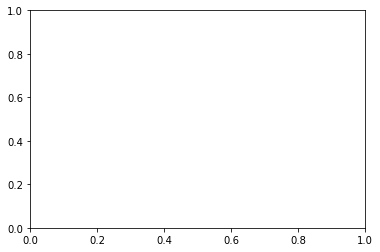

In [80]:
import matplotlib.pyplot as plt
y_kmeans = km.predict(matrix)
plt.scatter(matrix[:, 0], matrix[:, 5], c=y_kmeans, s=50, cmap='viridis')

centers =km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 5], c='black', s=200, alpha=0.5);

In [72]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'trump, co, business, vaccine',
                 1: 'business, co, small,mind ' ,              
                 2: 'health, co, mental, care', 
                 3: 'sport, people,it,one', 
                 4: 'co, sport, people,it'}

(-15.0, 15.0)

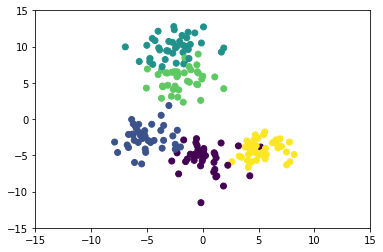

In [52]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

<B style="color:orangered;">K-means With Jaccard Distance </B>

<li><B>Clustering is a type of unsupervised machine learning which aims to find homogeneous subgroups such that objects in the same group (clusters) are more similar to each other than the others.</li>
<li><B>KMeans is a clustering algorithm which divides observations into k clusters. Since we can dictate the amount of clusters, it can be easily used in classification where we divide data into clusters which can be equal to or more than the number of classes.</B></li>

In [ ]:
import sys
import json
import re, string
import copy
from nltk.corpus import stopwords

regex = re.compile('[%s]' % re.escape(string.punctuation))
cachedStopWords = stopwords.words('english')

class kMeans():
    def __init__(self, seeds, tweets):
        self.seeds = seeds
        self.tweets = tweets
        self.max_iterations = 1000
        self.k = len(seeds)

        self.clusters = {} # cluster to tweetID
        self.rev_clusters = {} # reverse index, tweetID to cluster
        self.jaccardMatrix = {} # stores pairwise jaccard distance in a matrix

        self.initializeClusters()
        self.initializeMatrix()

    def jaccardDistance(self, setA, setB):
        # Calcualtes the Jaccard Distance of two sets
        try:
            return 1 - float(len(setA.intersection(setB))) / float(len(setA.union(setB)))
        except TypeError:
            print ('Invalid type. Type set expected.')

    def bagOfWords(self, string):
        # Returns a bag of words from a given string
        # Space delimited, removes punctuation, lowercase
        # Cleans text from url, stop words, tweet @, and 'rt'
        words = string.lower().strip().split(' ')
        for word in words:
            word = word.rstrip().lstrip()
            if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
            and not re.match('^@.*', word) \
            and not re.match('\s', word) \
            and word not in cachedStopWords \
            and word != 'rt' \
            and word != '':
                yield regex.sub('', word)

    def initializeMatrix(self):
        # Dynamic Programming: creates matrix storing pairwise jaccard distances
        for ID1 in self.tweets:
            self.jaccardMatrix[ID1] = {}
            bag1 = set(self.bagOfWords(self.tweets[ID1]['text']))
            for ID2 in self.tweets:
                if ID2 not in self.jaccardMatrix:
                    self.jaccardMatrix[ID2] = {}
                bag2 = set(self.bagOfWords(self.tweets[ID2]['text']))
                distance = self.jaccardDistance(bag1, bag2)
                self.jaccardMatrix[ID1][ID2] = distance
                self.jaccardMatrix[ID2][ID1] = distance

    def initializeClusters(self):
        # Initialize tweets to no cluster
        for ID in self.tweets:
            self.rev_clusters[ID] = -1

        # Initialize clusters with seeds
        for k in range(self.k):
            self.clusters[k] = set([self.seeds[k]])
            self.rev_clusters[self.seeds[k]] = k

    def calcNewClusters(self):
        # Initialize new cluster
        new_clusters = {}
        new_rev_cluster = {}
        for k in range(self.k):
            new_clusters[k] = set()

        for ID in self.tweets:
            min_dist = float("inf")
            min_cluster = self.rev_clusters[ID]

            # Calculate min average distance to each cluster
            for k in self.clusters:
                dist = 0
                count = 0
                for ID2 in self.clusters[k]:
                    dist += self.jaccardMatrix[ID][ID2]
                    count += 1
                if count > 0:
                    avg_dist = dist/float(count)
                    if min_dist > avg_dist:
                        min_dist = avg_dist
                        min_cluster = k
            new_clusters[min_cluster].add(ID)
            new_rev_cluster[ID] = min_cluster
        return new_clusters, new_rev_cluster

    def converge(self):
        # Initialize previous cluster to compare changes with new clustering
        new_clusters, new_rev_clusters = self.calcNewClusters()
        self.clusters = copy.deepcopy(new_clusters)
        self.rev_clusters = copy.deepcopy(new_rev_clusters)

        # Converges until old and new iterations are the same
        iterations = 1
        while iterations < self.max_iterations:
            new_clusters, new_rev_clusters = self.calcNewClusters()
            iterations += 1
            if self.rev_clusters != new_rev_clusters:
                self.clusters = copy.deepcopy(new_clusters)
                self.rev_clusters = copy.deepcopy(new_rev_clusters)
            else:
                #print iterations
                return
            
    
    def printClusterText(self):
        # Prints text of clusters
        for k in self.clusters:
            for ID in self.clusters[k]:
                print (self.tweets[ID]['text'])
            print ('\n')
 
    def printClusters(self):
        # Prints cluster ID and tweet IDs for that cluster
        for k in self.clusters:
            print (str(k) + ':' + ','.join(map(str,self.clusters[k])))

    def printMatrix(self):
        # Prints jaccard distance matrix
        for ID in self.tweets:
            for ID2 in self.tweets:
                print (ID, ID2, self.jaccardMatrix[ID][ID2])



    kmeans = kMeans(3, tweets)
    kmeans.converge()
    #kmeans.printClusterText()
    kmeans.printClusters()
    



In [22]:
import random as rd
import re
import math
import string


def pre_process_tweets(url):

    f = open(url, "r", encoding="utf8")
    tweets = list(f)
    list_of_tweets = []

    for i in range(len(tweets)):

        # remove \n from the end after every sentence
        tweets[i] = tweets[i].strip('\n')

        # Remove the tweet id and timestamp
        tweets[i] = tweets[i][50:]

        # Remove any word that starts with the symbol @
        tweets[i] = " ".join(filter(lambda x: x[0] != '@', tweets[i].split()))

        # Remove any URL
        tweets[i] = re.sub(r"http\S+", "", tweets[i])
        tweets[i] = re.sub(r"www\S+", "", tweets[i])

        # remove colons from the end of the sentences (if any) after removing url
        tweets[i] = tweets[i].strip()
        tweet_len = len(tweets[i])
        if tweet_len > 0:
            if tweets[i][len(tweets[i]) - 1] == ':':
                tweets[i] = tweets[i][:len(tweets[i]) - 1]

        # Remove any hash-tags symbols
        tweets[i] = tweets[i].replace('#', '')

        # Convert every word to lowercase
        tweets[i] = tweets[i].lower()

        # remove punctuations
        tweets[i] = tweets[i].translate(str.maketrans('', '', string.punctuation))

        # trim extra spaces
        tweets[i] = " ".join(tweets[i].split())

        # convert each tweet from string type to as list<string> using " " as a delimiter
        list_of_tweets.append(tweets[i].split(' '))

    f.close()

    return list_of_tweets


def k_means(tweets, k=4, max_iterations=50):

    centroids = []

    # initialization, assign random tweets as centroids
    count = 0
    hash_map = dict()
    while count < k:
        random_tweet_idx = rd.randint(0, len(tweets) - 1)
        if random_tweet_idx not in hash_map:
            count += 1
            hash_map[random_tweet_idx] = True
            centroids.append(tweets[random_tweet_idx])

    iter_count = 0
    prev_centroids = []

    # run the iterations until not converged or until the max iteration in not reached
    while (is_converged(prev_centroids, centroids)) == False and (iter_count < max_iterations):

        print("running iteration " + str(iter_count))

        # assignment, assign tweets to the closest centroids
        clusters = assign_cluster(tweets, centroids)

        # to check if k-means converges, keep track of prev_centroids
        prev_centroids = centroids

        # update, update centroid based on clusters formed
        centroids = update_centroids(clusters)
        iter_count = iter_count + 1

    if (iter_count == max_iterations):
        print("max iterations reached, K means not converged")
    else:
        print("converged")

    sse = compute_SSE(clusters)

    return clusters, sse


def is_converged(prev_centroid, new_centroids):

    # false if lengths are not equal
    if len(prev_centroid) != len(new_centroids):
        return False

    # iterate over each entry of clusters and check if they are same
    for c in range(len(new_centroids)):
        if " ".join(new_centroids[c]) != " ".join(prev_centroid[c]):
            return False

    return True


def assign_cluster(tweets, centroids):

    clusters = dict()

    # for every tweet iterate each centroid and assign closest centroid to a it
    for t in range(len(tweets)):
        min_dis = math.inf
        cluster_idx = -1;
        for c in range(len(centroids)):
            dis = getDistance(centroids[c], tweets[t])
            # look for a closest centroid for a tweet

            if centroids[c] == tweets[t]:
                # print("tweet and centroid are equal with c: " + str(c) + ", t" + str(t))
                cluster_idx = c
                min_dis = 0
                break

            if dis < min_dis:
                cluster_idx = c
                min_dis = dis

        # randomise the centroid assignment to a tweet if nothing is common
        if min_dis == 1:
            cluster_idx = rd.randint(0, len(centroids) - 1)

        # assign the closest centroid to a tweet
        clusters.setdefault(cluster_idx, []).append([tweets[t]])
        # print("tweet t: " + str(t) + " is assigned to cluster c: " + str(cluster_idx))
        # add the tweet distance from its closest centroid to compute sse in the end
        last_tweet_idx = len(clusters.setdefault(cluster_idx, [])) - 1
        clusters.setdefault(cluster_idx, [])[last_tweet_idx].append(min_dis)

    return clusters


def update_centroids(clusters):

    centroids = []

    # iterate each cluster and check for a tweet with closest distance sum with all other tweets in the same cluster
    # select that tweet as the centroid for the cluster
    for c in range(len(clusters)):
        min_dis_sum = math.inf
        centroid_idx = -1

        # to avoid redundant calculations
        min_dis_dp = []

        for t1 in range(len(clusters[c])):
            min_dis_dp.append([])
            dis_sum = 0
            # get distances sum for every of tweet t1 with every tweet t2 in a same cluster
            for t2 in range(len(clusters[c])):
                if t1 != t2:
                    if t2 < t1:
                        dis = min_dis_dp[t2][t1]
                    else:
                        dis = getDistance(clusters[c][t1][0], clusters[c][t2][0])

                    min_dis_dp[t1].append(dis)
                    dis_sum += dis
                else:
                    min_dis_dp[t1].append(0)

            # select the tweet with the minimum distances sum as the centroid for the cluster
            if dis_sum < min_dis_sum:
                min_dis_sum = dis_sum
                centroid_idx = t1

        # append the selected tweet to the centroid list
        centroids.append(clusters[c][centroid_idx][0])

    return centroids


def getDistance(tweet1, tweet2):

    # get the intersection
    intersection = set(tweet1).intersection(tweet2)

    # get the union
    union = set().union(tweet1, tweet2)

    # return the jaccard distance
    return 1 - (len(intersection) / len(union))


def compute_SSE(clusters):

    sse = 0
    # iterate every cluster 'c', compute SSE as the sum of square of distances of the tweet from it's centroid
    for c in range(len(clusters)):
        for t in range(len(clusters[c])):
            sse = sse + (clusters[c][t][1] * clusters[c][t][1])

    return sse


if __name__ == '__main__':

    data_url = 'bdtweets1.csv'

    tweets = tweets = pd.read_csv("bdtweets1.csv", usecols = ['lemma'])


    # default number of experiments to be performed
    experiments = 2

    # default value of K for K-means
    k = 3

    # for every experiment 'e', run K-means
    for e in range(experiments):

        print("------ Running K means for experiment no. " + str((e + 1)) + " for k = " + str(k))

        clusters, sse = k_means(tweets, k)

        # for every cluster 'c', print size of each cluster
        for c in range(len(clusters)):
            print(str(c+1) + ": ", str(len(clusters[c])) + " tweets")
             # to print tweets in a cluster
            for t in range(len(clusters[c])):
                print("t" + str(t) + ", " + (" ".join(clusters[c][t][0])))

        print("--> SSE : " + str(sse))
        print('\n')

         #increment k after every experiment
        k = k + 1

ValueError: Usecols do not match columns, columns expected but not found: ['lemma']

In [38]:
from __future__ import division

class Jaccard:

	def  __init__(self,args,args_ii):
		self.args = self.tokenize(args)
		self.args_ii = self.tokenize(args_ii)

	def intersect(self):
		return [i for i in self.args if i in self.args_ii]

	def union(self):
		return set(self.args + self.args_ii)

	def similarity(self):
		intersect = len(self.intersect())
		union = len(self.union())
		if intersect == None and union == None:
			return 1
		return intersect / union

	def distance(self):
		return 1 - self.similarity()

	def tokenize(self,item):
		item = item.lower()
		return item.split(" ")

jaccard = Jaccard("tweets[text][88]","tweets[text][12520]")

similarity = jaccard.similarity()
print (similarity)

0.0


In [42]:
import sys
import json
import re, string
import copy
from nltk.corpus import stopwords

regex = re.compile('[%s]' % re.escape(string.punctuation))
StopWord = stopwords.words('english')


class TweetClusering():
    def __init__(self, JsoneFile, InitialSeedsFile,iterations):

        tweets_ID = {}
        with open(JsoneFile, 'r') as f:
            for line in f:
                tweet = json.loads(line)
                tweets_ID[tweet['id']] = tweet

        f = open(InitialSeedsFile)
        InitialSeeds = [int(line.rstrip(',\n')) for line in f.readlines()]
        f.close()

        self.InitialSeeds = InitialSeeds
        self.tweets_ID = tweets_ID
        self.max_iterations = iterations
        self.k = len(InitialSeeds)
        self.clusters = {}  # cluster to tweetID
        self.rev_clusters = {}  # reverse index, tweetID to cluster
        self.JC_MAT = {}  # stores pairwise jaccard distance in a matrix

    def jaccardDistance(self, setA, setB):
        # Calcualtes the Jaccard Distance of two sets
        return 1 - float(len(setA.intersection(setB))) / float(len(setA.union(setB)))

    def Dictionary(self, string):
        # Returns a bag of words from a given string
        # Space delimited, removes punctuation, lowercase
        # Cleans text from url, stop words, tweet @, and 'rt'
        words = string.lower().strip().split(' ')
        for word in words:
            word = word.rstrip().lstrip()
            if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
                    and not re.match('^@.*', word) \
                    and not re.match('\s', word) \
                    and word not in StopWord \
                    and word != 'rt' \
                    and word != '':
                yield regex.sub('', word)

    def Create_Matrix(self):
        # Dynamic Programming: creates matrix storing pairwise jaccard distances
        for ID1 in self.tweets_ID:
            self.JC_MAT[ID1] = {}
            TW1 = set(self.Dictionary(self.tweets_ID[ID1]['text']))
            for ID2 in self.tweets_ID:
                if ID2 not in self.JC_MAT:
                    self.JC_MAT[ID2] = {}
                TW2 = set(self.Dictionary(self.tweets_ID[ID2]['text']))
                distance = self.jaccardDistance(TW1, TW2)
                self.JC_MAT[ID1][ID2] = distance
                self.JC_MAT[ID2][ID1] = distance

    def Create_Clusters(self):
        # Initialize tweets_ID to no cluster
        for ID in self.tweets_ID:
            self.rev_clusters[ID] = -1

        # Initialize clusters with InitialSeeds
        for k in range(self.k):
            self.clusters[k] = set([self.InitialSeeds[k]])
            self.rev_clusters[self.InitialSeeds[k]] = k

    def calcNewClusters(self):
        # Initialize new cluster
        new_clusters = {}
        new_rev_cluster = {}
        for k in range(self.k):
            new_clusters[k] = set()

        for ID in self.tweets_ID:
            min_dist = float("inf")
            min_cluster = self.rev_clusters[ID]

            # Calculate min average distance to each cluster
            for k in self.clusters:
                dist = 0
                count = 0
                for ID2 in self.clusters[k]:
                    dist += self.JC_MAT[ID][ID2]
                    count += 1
                if count > 0:
                    avg_dist = dist / float(count)
                    if min_dist > avg_dist:
                        min_dist = avg_dist
                        min_cluster = k
            new_clusters[min_cluster].add(ID)
            new_rev_cluster[ID] = min_cluster
        return new_clusters, new_rev_cluster

    def optimize(self):
        # Initialize previous cluster to compare changes with new clustering
        new_clusters, new_rev_clusters = self.calcNewClusters()
        self.clusters = copy.deepcopy(new_clusters)
        self.rev_clusters = copy.deepcopy(new_rev_clusters)

        # Converges until old and new iterations are the same
        iterations = 1
        while iterations < self.max_iterations:
            new_clusters, new_rev_clusters = self.calcNewClusters()
            iterations += 1
            if self.rev_clusters != new_rev_clusters:
                self.clusters = copy.deepcopy(new_clusters)
                self.rev_clusters = copy.deepcopy(new_rev_clusters)
            else:
                return

    def calc_SSE(self):
        self.SSE = []
        for cluster in self.clusters:
            error = 0
            for ID1 in self.clusters[cluster]:
                error += (self.JC_MAT[self.InitialSeeds[cluster]][ID1])
            self.SSE.append(error)

    def printClusters(self,out_file):
        # Prints cluster ID and tweet IDs for that cluster
        file = open(out_file, 'w+')
        file.write('CS6375.004 - Machine Learning: Assignment-6 : Part II - Tweets Clustering using k-means \n\n')
        K_clusters=[]
        for k in self.clusters:
            K_clusters.append(str(k+1) + ':' + ','.join(map(str, self.clusters[k])))
            #print(str(k+1) + ' : ' + ','.join(map(str, self.clusters[k])))
            file.write('Cluster '+ str(k+1) + ' : ' + ', '.join(map(str, self.clusters[k])))
            file.write("\n")

        '''
        print("======================================================")
        for cluster in self.clusters:
            print('For cluster '+str(cluster+1) + ' : SSE = ' + str(round(self.SSE[cluster], 3)))
        '''
        TotalSSE = sum(self.SSE)
        print("======================================================")
        print("Validation SSE = %3.4f"%TotalSSE)
        print('\nResults are available in output file')
        file.write("======================================================")
        file.write("\n")
        file.write("Number of Clusters = %d" % len(self.SSE))
        file.write("\n")
        file.write("Validation SSE = %3.4f" % TotalSSE)

# the main part starts from here
if len(sys.argv) != 4:
    print("Error : Please enter files in this format <json file> <InitialSeeds file> <outputfile.txt>")
    exit(-1)
# initialize code and load data
TC = TweetClusering(live_tweets1.json, sys.argv[2],1000)
# Create clusters based on initial seeds
TC.Create_Clusters()
# create distance matrix using Jaccard distance
TC.Create_Matrix()
# optimize to find the best clusters
TC.optimize()
# calculate SSE
TC.calc_SSE()
# show and save results in the given text files
TC.printClusters(sys.argv[3])

Error : Please enter files in this format <json file> <InitialSeeds file> <outputfile.txt>


NameError: name 'live_tweets1' is not defined

In [ ]:
import json,sys

# Reading json file in a dictionary
def getTweets(tweetsJsonFile):
    tweets = {}
    with open(tweetsJsonFile) as json_data:
        for line in json_data:
            tweet = json.loads(line)
            tweets[str(tweet["id"])] = tweet["text"]
            print(tweets)
    return tweets
test= 

In [7]:
from math import*
def jaccard_similarity(text,text1):
    intersection_cardinality = len(set.intersection(*[set(text1), set(text2)]))
    union_cardinality = len(set.union(*[set(text1), set(text2)]))
    return intersection_cardinality/float(union_cardinality)


In [28]:
jaccard_similarity(tweets['lemma'][1],tweets['lemma'][2])

0.05263157894736842

In [30]:
jaccard_similarity(tweets['lemma'][1][0],tweets['lemma'][1][2])

0.1

In [32]:
tweets['lemma'][1][0]


'health'

In [33]:
tweets['lemma'][1][2]

'servic'

In [17]:
from collection import counter

def intersection(tweetdata_one, tweetdata_two): #function count intersection between two words
    result_intesection = 0
    for word in tweetdata_one:
        while tweetdata_one[word] != 0 and word in tweetdata_two:
            if word in tweetdata_two:
                tweetdata_two[word] = tweetdata_two[word] - 1
                tweetdata_one[word] = tweetdata_one[word] - 1
                if tweetdata_two[word] == 0:
                    tweetdata_two.pop(word, None)
                result_intesection += 1
    return result_intesection

def union(tweetdata_one, tweetdata_two): #function count union of two words
    result_union = 0
    for word in tweetdata_one:
        if word in tweetdata_two:
            result_union = result_union + max(tweetdata_one[word], tweetdata_two[word])
            tweetdata_two.pop(word, None)
        else:
            result_union = result_union + tweetdata_one[word]
    for word in tweetdata_two:
        result_union = result_union + tweetdata_two[word]
    return result_union




def jaccard_distance(tweetDataOne, tweetDataTwo):
    tweetDataOne_count = countWords(tweetDataOne)
    tweetDataTwo_count = countWords(tweetDataTwo)
    tweetdata_union = union(dict(tweetDataOne_count), dict(tweetDataTwo_count))
    tweetdata_intersect = intersection(dict(tweetDataOne_count), dict(tweetDataTwo_count))
    return 1.0 - tweetdata_intersect * 1.0 / tweetdata_union



In [21]:
jaccard_distance(tweets['lemma'][0],tweets['lemma'][1])

NameError: name 'countWords' is not defined

In [31]:
 def jaccardDistance(setA, setB):
        # Calcualtes the Jaccard Distance of two sets
        try:
            return 1 - float(len(setA.intersection(setB))) / float(len(setA.union(setB)))
        except TypeError:
            print ('Invalid type. Type set expected.')

In [32]:


jaccardDistance(set(tweets['lemma'][0]), set(tweets['lemma'][1]))

1.0

In [35]:
tweets['lemma'][0]

['great', 'anoth', 'go', 'busi', 'sale']

In [45]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle


# read csv input file
# input_data = pd.read_csv("input_data.txt", sep="\t")


# initialize KMeans object specifying the number of desired clusters
kmeans = KMeans(n_clusters=4)


# learning the clustering from the input date
kmeans.fit(tweets['lemma'].values)


# output the labels for the input data
print(kmeans.labels_)


# predict the classification for given data sample 
# predicted_class = kmeans.predict([[1, 10, 15]])
# print(predicted_class)

ValueError: setting an array element with a sequence.

In [30]:
import random

random.seed(444447777)
print(random.random())

0.8846341176535043


In [ ]:

import sys
import json
import re, string
import copy
from nltk.corpus import stopwords

regex = re.compile('[%s]' % re.escape(string.punctuation))
cachedStopWords = stopwords.words('english')

class kMeans():
    def __init__(self, seeds, tweets):
        self.seeds = seeds
        self.tweets = tweets
        self.max_iterations = 10
        self.k = len(seeds)

        self.clusters = {} # cluster to tweetID
        self.rev_clusters = {} # reverse index, tweetID to cluster
        self.jaccardMatrix = {} # stores pairwise jaccard distance in a matrix

        self.initializeClusters()
        self.initializeMatrix()

    def jaccardDistance(self, setA, setB):
        # Calcualtes the Jaccard Distance of two sets
        try:
            return 1 - float(len(setA.intersection(setB))) / float(len(setA.union(setB)))
        except TypeError:
            print 'Invalid type. Type set expected.'

    def bagOfWords(self, string):
        # Returns a bag of words from a given string
        # Space delimited, removes punctuation, lowercase
        # Cleans text from url, stop words, tweet @, and 'rt'
        words = string.lower().strip().split(' ')
        for word in words:
            word = word.rstrip().lstrip()
            if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
            and not re.match('^@.*', word) \
            and not re.match('\s', word) \
            and word not in cachedStopWords \
            and word != 'rt' \
            and word != '':
                yield regex.sub('', word)

    def initializeMatrix(self):
        # Dynamic Programming: creates matrix storing pairwise jaccard distances
        for ID1 in self.tweets:
            self.jaccardMatrix[ID1] = {}
            bag1 = set(self.bagOfWords(self.tweets[ID1]['text']))
            for ID2 in self.tweets:
                if ID2 not in self.jaccardMatrix:
                    self.jaccardMatrix[ID2] = {}
                bag2 = set(self.bagOfWords(self.tweets[ID2]['text']))
                distance = self.jaccardDistance(bag1, bag2)
                self.jaccardMatrix[ID1][ID2] = distance
                self.jaccardMatrix[ID2][ID1] = distance

    def initializeClusters(self):
        # Initialize tweets to no cluster
        for ID in self.tweets:
            self.rev_clusters[ID] = -1

        # Initialize clusters with seeds
        for k in range(self.k):
            self.clusters[k] = set([self.seeds[k]])
            self.rev_clusters[self.seeds[k]] = k

    def calcNewClusters(self):
        # Initialize new cluster
        new_clusters = {}
        new_rev_cluster = {}
        for k in range(self.k):
            new_clusters[k] = set()

        for ID in self.tweets:
            min_dist = float("inf")
            min_cluster = self.rev_clusters[ID]

            # Calculate min average distance to each cluster
            for k in self.clusters:
                dist = 0
                count = 0
                for ID2 in self.clusters[k]:
                    dist += self.jaccardMatrix[ID][ID2]
                    count += 1
                if count > 0:
                    avg_dist = dist/float(count)
                    if min_dist > avg_dist:
                        min_dist = avg_dist
                        min_cluster = k
            new_clusters[min_cluster].add(ID)
            new_rev_cluster[ID] = min_cluster
        return new_clusters, new_rev_cluster

    def converge(self):
        # Initialize previous cluster to compare changes with new clustering
        new_clusters, new_rev_clusters = self.calcNewClusters()
        self.clusters = copy.deepcopy(new_clusters)
        self.rev_clusters = copy.deepcopy(new_rev_clusters)

        # Converges until old and new iterations are the same
        iterations = 1
        while iterations < self.max_iterations:
            new_clusters, new_rev_clusters = self.calcNewClusters()
            iterations += 1
            if self.rev_clusters != new_rev_clusters:
                self.clusters = copy.deepcopy(new_clusters)
                self.rev_clusters = copy.deepcopy(new_rev_clusters)
            else:
                #print iterations
                return
            
    
    def printClusterText(self):
        # Prints text of clusters
        for k in self.clusters:
            for ID in self.clusters[k]:
                print self.tweets[ID]['text']
            print '\n'
 
    def printClusters(self):
        # Prints cluster ID and tweet IDs for that cluster
        for k in self.clusters:
            print str(k) + ':' + ','.join(map(str,self.clusters[k]))

    def printMatrix(self):
        # Prints jaccard distance matrix
        for ID in self.tweets:
            for ID2 in self.tweets:
                print ID, ID2, self.jaccardMatrix[ID][ID2]

def main():
    if len(sys.argv) != 3:
        print >> sys.stderr, 'Usage: %s [json file] [seeds file]' % (sys.argv[0])
        exit(-1)
    
    tweets = {}
    with open(sys.argv[1], 'r') as f:
        for line in f:
            tweet = json.loads(line)
            tweets[tweet['id']] = tweet
    
    f = open(sys.argv[2])
    seeds = [int(line.rstrip(',\n')) for line in f.readlines()]
    f.close()

    kmeans = kMeans(seeds, tweets)
    kmeans.converge()
    #kmeans.printClusterText()
    kmeans.printClusters()
    

if __name__ == '__main__':
    main()

In [ ]:
import sys
import json
import re, string
import copy
from nltk.corpus import stopwords

regex = re.compile('[%s]' % re.escape(string.punctuation))
cachedStopWords = stopwords.words('english')

class kMeans():
    def __init__(self, seeds, tweets):
        self.seeds = seeds
        self.tweets = tweets
        self.max_iterations = 10
        self.k = len(seeds)

        self.clusters = {} # cluster to tweetID
        self.rev_clusters = {} # reverse index, tweetID to cluster
        self.jaccardMatrix = {} # stores pairwise jaccard distance in a matrix

        self.initializeClusters()
        self.initializeMatrix()

    
    def intersection(tweetdata_one, tweetdata_two): #function count intersection between two words
    result_intesection = 0
    for word in tweetdata_one:
        while tweetdata_one[word] != 0 and word in tweetdata_two:
            if word in tweetdata_two:
                tweetdata_two[word] = tweetdata_two[word] - 1
                tweetdata_one[word] = tweetdata_one[word] - 1
                if tweetdata_two[word] == 0:
                    tweetdata_two.pop(word, None)
                result_intesection += 1
    return result_intesection

    def union(tweetdata_one, tweetdata_two): #function count union of two words
    result_union = 0
    for word in tweetdata_one:
        if word in tweetdata_two:
            result_union = result_union + max(tweetdata_one[word], tweetdata_two[word])
            tweetdata_two.pop(word, None)
        else:
            result_union = result_union + tweetdata_one[word]
    for word in tweetdata_two:
        result_union = result_union + tweetdata_two[word]
    return result_union


In [ ]:
import sys
import json
import re, string
import copy
from nltk.corpus import stopwords

regex = re.compile('[%s]' % re.escape(string.punctuation))
cachedStopWords = stopwords.words('english')

class kMeans():
    def __init__(self, seeds, tweets):
        self.seeds = seeds
        self.tweets = tweets
        self.max_iterations = 30
        self.k = len(seeds)

        self.clusters = {} # cluster for tweet text
        self.rev_clusters = {} # reverse index, tweetID to cluster
        self.jaccardMatrix = {} # stores pairwise jaccard distance in a matrix

        self.initializeClusters()
        self.initializeMatrix()

    def jaccardDistance(self, setA, setB):
        # Calcualtes the Jaccard Distance of two sets
        try:
            return 1 - float(len(setA.intersection(setB))) / float(len(setA.union(setB)))
        except TypeError:
            print ('Invalid type. Type set expected.')

    def bagOfWords(self, string):
        # Returns a bag of words from a given string
        # Space delimited, removes punctuation, lowercase
        # Cleans text from url, stop words, tweet @, and 'rt'
        words = string.lower().strip().split(' ')
        for word in words:
            word = word.rstrip().lstrip()
            if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
            and not re.match('^@.*', word) \
            and not re.match('\s', word) \
            and word not in cachedStopWords \
            and word != 'rt' \
            and word != '':
                yield regex.sub('', word)

    def initializeMatrix(self):
        # Dynamic Programming: creates matrix storing pairwise jaccard distances
        for text1 in self.tweets:
            self.jaccardMatrix[text1] = {}
            bag1 = set(self.bagOfWords(self.tweets[tex1]['text']))
            for ID2 in self.tweets:
                if ID2 not in self.jaccardMatrix:
                    self.jaccardMatrix[ID2] = {}
                bag2 = set(self.bagOfWords(self.tweets[ID2]['text']))
                distance = self.jaccardDistance(bag1, bag2)
                self.jaccardMatrix[ID1][ID2] = distance
                self.jaccardMatrix[ID2][ID1] = distance

    def initializeClusters(self):
        # Initialize tweets to no cluster
        for ID in self.tweets:
            self.rev_clusters[ID] = -1

        # Initialize clusters with seeds
        for k in range(self.k):
            self.clusters[k] = set([self.seeds[k]])
            self.rev_clusters[self.seeds[k]] = k

    def calcNewClusters(self):
        # Initialize new cluster
        new_clusters = {}
        new_rev_cluster = {}
        for k in range(self.k):
            new_clusters[k] = set()

        for ID in self.tweets:
            min_dist = float("inf")
            min_cluster = self.rev_clusters[ID]

            # Calculate min average distance to each cluster
            for k in self.clusters:
                dist = 0
                count = 0
                for ID2 in self.clusters[k]:
                    dist += self.jaccardMatrix[ID][ID2]
                    count += 1
                if count > 0:
                    avg_dist = dist/float(count)
                    if min_dist > avg_dist:
                        min_dist = avg_dist
                        min_cluster = k
            new_clusters[min_cluster].add(ID)
            new_rev_cluster[ID] = min_cluster
        return new_clusters, new_rev_cluster

    def converge(self):
        # Initialize previous cluster to compare changes with new clustering
        new_clusters, new_rev_clusters = self.calcNewClusters()
        self.clusters = copy.deepcopy(new_clusters)
        self.rev_clusters = copy.deepcopy(new_rev_clusters)

        # Converges until old and new iterations are the same
        iterations = 1
        while iterations < self.max_iterations:
            new_clusters, new_rev_clusters = self.calcNewClusters()
            iterations += 1
            if self.rev_clusters != new_rev_clusters:
                self.clusters = copy.deepcopy(new_clusters)
                self.rev_clusters = copy.deepcopy(new_rev_clusters)
            else:
                #print iterations
                return
            
    
    def printClusterText(self):
        # Prints text of clusters
        for k in self.clusters:
            for ID in self.clusters[k]:
                print self.tweets[ID]['text']
            print '\n'
 
    def printClusters(self):
        # Prints cluster ID and tweet IDs for that cluster
        for k in self.clusters:
            print str(k) + ':' + ','.join(map(str,self.clusters[k]))

    def printMatrix(self):
        # Prints jaccard distance matrix
        for ID in self.tweets:
            for ID2 in self.tweets:
                print ID, ID2, self.jaccardMatrix[ID][ID2]

def main():
    if len(sys.argv) != 3:
        print >> sys.stderr, 'Usage: %s [json file] [seeds file]' % (sys.argv[0])
        exit(-1)
    
    tweets = {}
    with open(sys.argv[1], 'r') as f:
        for line in f:
            tweet = json.loads(line)
            tweets[tweet['id']] = tweet
    
    f = open(sys.argv[2])
    seeds = [int(line.rstrip(',\n')) for line in f.readlines()]
    f.close()

    kmeans = kMeans(seeds, tweets)
    kmeans.converge()
    kmeans.printClusterText()
    kmeans.printClusters()
    

if __name__ == '__main__':
    main()

In [52]:
import nltk

w1 = 'mappingsttr'
w2 = 'mappings'

nltk.edit_distance(w1, w2)

3

In [87]:
def identity_tokenizer(text):
    return text
vect = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x = vect.fit_transform(tweets.lemma.values)
        

In [102]:
indices = np.argsort(vect.idf_)[::-1]
features = vect.get_feature_names()
top_n = 50
top_features = [features[i] for i in indices[:top_n]]
top_features


['ⓗⓐ',
 'networ',
 'nerdcant',
 'nervewrack',
 'nestl',
 'netmatico',
 'netting.diego',
 'netwo',
 'networkservic',
 'neutral',
 'neurip',
 'neuro',
 'neurologist',
 'neurosci',
 'neurosurgeo',
 'neurotox',
 'nerd',
 'neptun',
 "nephew'",
 'nepal',
 'neonazi',
 'neonat',
 'neon',
 'neomarx',
 'neog',
 'neo',
 'nelson',
 'nellen',
 'neill',
 'neilallen',
 'neighbour',
 "negvac'",
 'negati',
 'neurotoxin',
 'nevi',
 'neek',
 'ngam',
 'nexigo',
 'nextgen',
 'nextlab',
 'nexu',
 'nffn',
 'nfu',
 'ngl',
 'newark',
 'ngold',
 'ngonian',
 'nhgopcoronacaucu',
 'nhifdoctorshealth',
 'nhl']

In [89]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(20):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)
    

Top terms per cluster:
Cluster 0:
 one
 /
 .
 …
 busi
 health
 love
 ...
 best
 ’
Cluster 1:
 like
 /
 .
 …
 busi
 look
 health
 ’
 get
 i
Cluster 2:
 ’
 s
 it
 /
 .
 i
 …
 m
 busi
 that
Cluster 3:
 )
 (
 /
 …
 busi
 .
 health
 not
 free
 dm
Cluster 4:
 mental
 health
 /
 .
 …
 ’
 take
 physic
 good
 care
Cluster 5:
 health
 /
 …
 care
 .
 public
 good
 depart
 team
 biden
Cluster 6:
 "
 /
 …
 .
 busi
 health
 the
 say
 ?
 like
Cluster 7:
 '
 /
 …
 .
 s
 health
 busi
 heir
 rover
 opt
Cluster 8:
 /
 …
 busi
 .
 sport
 get
 make
 peopl
 new
 us
Cluster 9:
 busi
 …
 sport
 .
 get
 love
 go
 great
 good
 need
Cluster 10:
 t
 ’
 don
 /
 .
 busi
 can
 …
 y
 all
Cluster 11:
 say
 /
 …
 .
 busi
 health
 ’
 “
 sport
 peopl
Cluster 12:
 small
 busi
 /
 own
 black
 …
 owner
 .
 t.co/mo5r6ckzu5
 hey
Cluster 13:
 vaccin
 /
 covid
 19
 …
 pfizer
 health
 .
 get
 first
Cluster 14:
 psg
 istanbul
 basaksehir
 walk
 /
 player
 match
 racism
 pitch
 suspend
Cluster 15:
 mind
 busi
 .
 /
 ’
 ya
 ur
 see

<B> References </B>

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python</br>
https://datascienceplus.com/twitter-analysis-with-python/</br>
https://berkeley-stat159-f17.github.io/stat159-f17/lectures/11-strings/11-nltk..html</br>
https://www.xspdf.com/resolution/52940753.html</br>
https://medium.com/analytics-vidhya/exploring-twitter-data-using-python-af1287ee65f1</br>
https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
https://www.xspdf.com/resolution/55501459.html

<B>Annex</B>

In [2]:
pip install watermark


Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext watermark


In [4]:
%watermark?



Docstring:
::

  %watermark [-a AUTHOR] [-d] [-n] [-t] [-i] [-z] [-u] [-c CUSTOM_TIME] [-v] [-p PACKAGES] [-h] [-m] [-g] [-r]
                 [-b] [-w] [-iv]

IPython magic function to print date/time stamps
and various system information.

optional arguments:
  -a AUTHOR, --author AUTHOR
                        prints author name
  -d, --date            prints current date as YYYY-mm-dd
  -n, --datename        prints date with abbrv. day and month names
  -t, --time            prints current time as HH-MM-SS
  -i, --iso8601         prints the combined date and time including the time zone in the ISO 8601 standard with UTC
                        offset
  -z, --timezone        appends the local time zone
  -u, --updated         appends a string "Last updated: "
  -c CUSTOM_TIME, --custom_time CUSTOM_TIME
                        prints a valid strftime() string
  -v, --python          prints Python and IPython version
  -p PACKAGES, --packages PACKAGES
                        prints ve

In [6]:
%watermark -v -m -p  pandas,numpy,plt,kmeans,counter

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

pandas : 1.0.5
numpy  : 1.18.5
plt    : not installed
kmeans : not installed
counter: not installed

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [7]:
%watermark -v -m -p TfidfVectorizer,CountVectorizer,text,KMeansClusterer,cosine_similarity,TruncatedSVD,datetime,nltk,PCA,pd,np



Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

TfidfVectorizer  : not installed
CountVectorizer  : not installed
text             : not installed
KMeansClusterer  : not installed
cosine_similarity: not installed
TruncatedSVD     : not installed
datetime         : unknown
nltk             : 3.5
PCA              : not installed
pd               : not installed
np               : not installed

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [11]:
%watermark -v -m -p  display,seaborn 

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

display: not installed
seaborn: 0.10.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

